In [1]:
import os
#datapath = os.path.join("\.")
datapath = ""
print( datapath )

In [2]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Load the data
#leistung = pd.read_csv(datapath + "LASERAUFTRAEGE_rework.csv", 
#                        header='infer', 
#                        thousands='.', 
#                        decimal=',',
#                        delimiter=';' )
#print( leistung )

df = pd.read_excel('LASERAUFTRAEGE_rework.xlsx')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025872EE6470>,
      dtype=object)

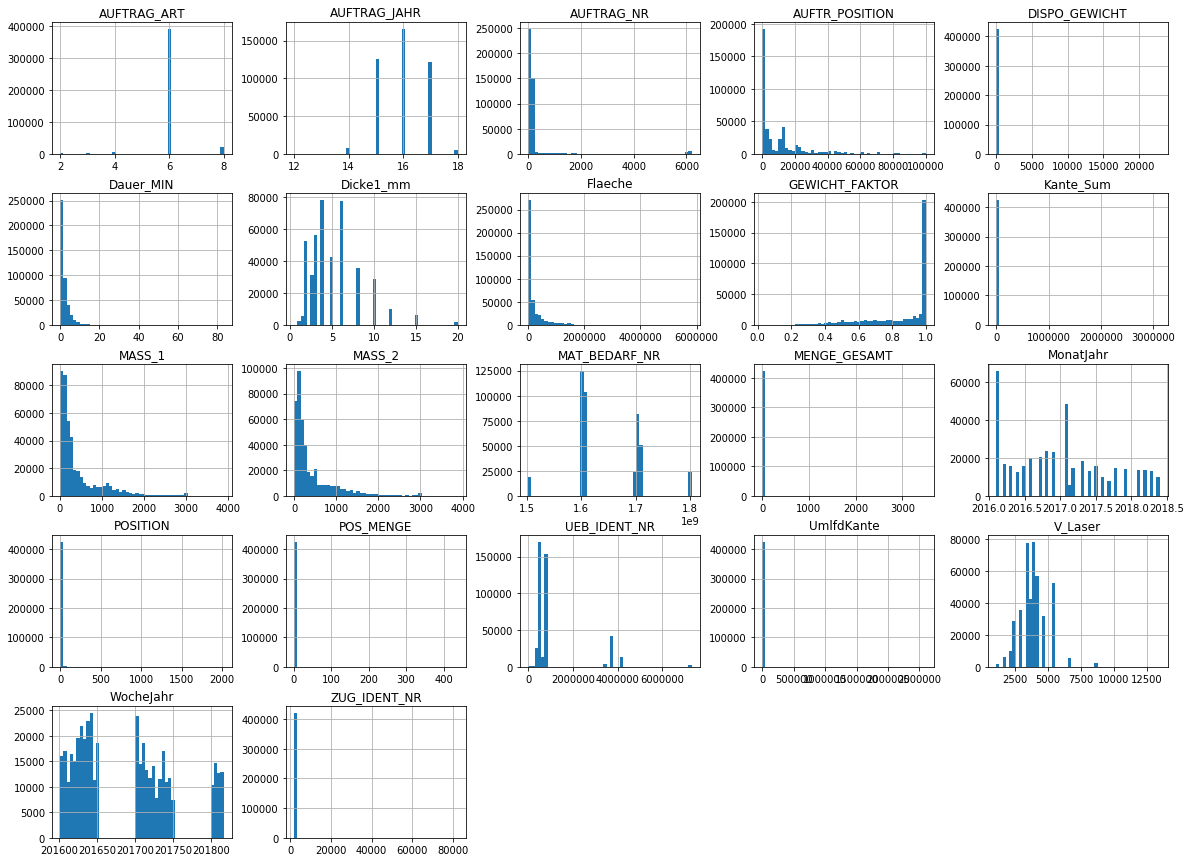

In [3]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [4]:
print( df )

        DATUM_IMV  MonatJahr  WocheJahr  AUFTRAG_ART  AUFTRAG_JAHR  \
0      2016-01-04     2016.1     201601            4            15   
1      2016-01-04     2016.1     201601            8            15   
2      2016-01-04     2016.1     201601            8            15   
3      2016-01-04     2016.1     201601            4            15   
4      2016-01-04     2016.1     201601            4            15   
5      2016-01-04     2016.1     201601            4            15   
6      2016-01-04     2016.1     201601            4            15   
7      2016-01-04     2016.1     201601            4            15   
8      2016-01-04     2016.1     201601            4            15   
9      2016-01-04     2016.1     201601            4            15   
10     2016-01-04     2016.1     201601            4            15   
11     2016-01-04     2016.1     201601            4            15   
12     2016-01-04     2016.1     201601            4            15   
13     2016-01-04   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025810695DD8>,
      dtype=object)

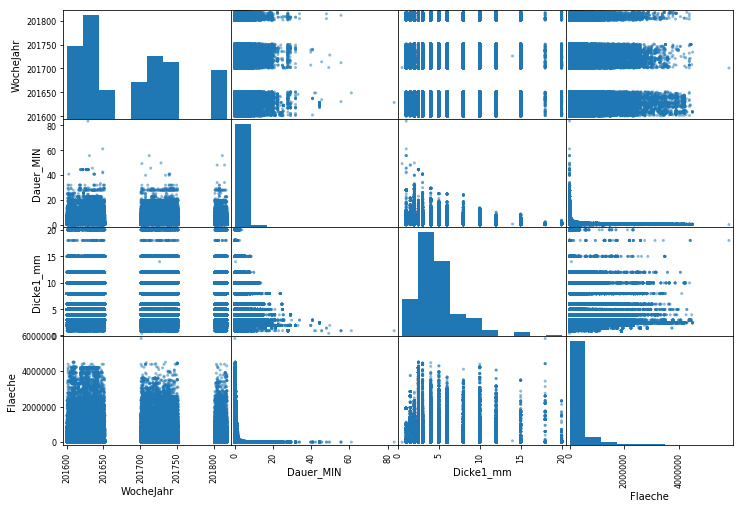

In [5]:
from pandas.plotting import scatter_matrix
attributes = ["WocheJahr", "Dauer_MIN", "Dicke1_mm", "Flaeche"]
scatter_matrix(df[attributes], figsize=(12,8))

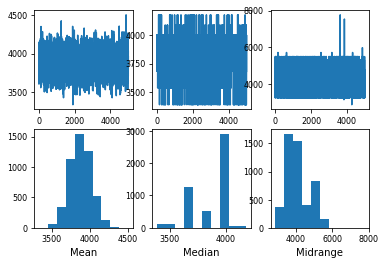

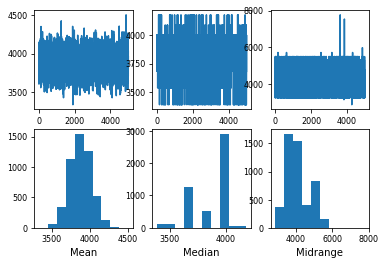

In [6]:
from pandas.plotting import bootstrap_plot
data = df["V_Laser"]
bootstrap_plot(data, samples=5000)

In [7]:
df.describe()

,MonatJahr,WocheJahr,AUFTRAG_ART,AUFTRAG_JAHR,AUFTRAG_NR,AUFTR_POSITION,UEB_IDENT_NR,POSITION,ZUG_IDENT_NR,POS_MENGE,...,GEWICHT_FAKTOR,MAT_BEDARF_NR,MASS_1,MASS_2,Flaeche,Dicke1_mm,UmlfdKante,Kante_Sum,V_Laser,Dauer_MIN
count,427427.00000,427427.000000,427427.000000,427427.000000,427427.000000,427427.000000,4.274270e+05,427427.000000,427427.000000,427427.000000,...,427427.000000,4.274270e+05,427427.000000,427427.000000,4.274270e+05,427427.000000,4.274270e+05,4.274270e+05,427427.000000,427427.000000
mean,2017.01383,201685.525528,6.003795,15.977025,274.548159,10315.597964,1.115353e+06,3.089711,2454.117147,1.416595,...,0.853995,1.647768e+09,428.231710,421.647074,2.195045e+05,5.056550,3.243917e+03,3.892700e+03,3879.752322,2.167750
std,0.68577,64.683767,0.684386,0.846963,889.868936,15667.127916,1.193728e+06,9.282673,4359.157998,1.553051,...,0.197964,6.607227e+07,526.054866,514.975610,4.317452e+05,2.915612,1.697129e+04,2.036555e+04,1018.378185,2.559480
min,2016.10000,201601.000000,2.000000,12.000000,1.000000,1.000000,0.000000e+00,1.000000,2015.000000,1.000000,...,0.026300,1.502671e+09,5.000000,2.000000,1.000000e+02,0.500000,6.000000e+01,7.200000e+01,1044.253388,0.000898
25%,2016.40000,201629.000000,6.000000,15.000000,54.000000,413.500000,5.668680e+05,1.000000,2018.000000,1.000000,...,0.736700,1.603553e+09,98.000000,100.000000,1.342600e+04,3.000000,7.840000e+02,9.408000e+02,3384.824872,0.690072
50%,2016.90000,201651.000000,6.000000,16.000000,109.000000,2630.000000,7.368240e+05,1.000000,2019.000000,1.000000,...,0.967900,1.608839e+09,200.000000,203.000000,4.923600e+04,4.000000,1.696000e+03,2.035200e+03,4004.033262,1.278809
75%,2017.50000,201731.000000,6.000000,17.000000,185.000000,13100.000000,7.945750e+05,3.000000,2021.000000,2.000000,...,1.000000,1.704489e+09,519.000000,512.000000,2.208960e+05,6.000000,3.320000e+03,3.984000e+03,4183.482975,2.719671
max,2018.40000,201817.000000,8.000000,18.000000,6202.000000,99998.000000,7.322062e+06,2018.000000,82228.000000,438.000000,...,1.000000,1.803377e+09,3896.000000,3886.000000,5.828220e+06,20.000000,2.599922e+06,3.119906e+06,13484.237800,83.360278


In [8]:
df.corr()

,MonatJahr,WocheJahr,AUFTRAG_ART,AUFTRAG_JAHR,AUFTRAG_NR,AUFTR_POSITION,UEB_IDENT_NR,POSITION,ZUG_IDENT_NR,POS_MENGE,...,GEWICHT_FAKTOR,MAT_BEDARF_NR,MASS_1,MASS_2,Flaeche,Dicke1_mm,UmlfdKante,Kante_Sum,V_Laser,Dauer_MIN
MonatJahr,1.000000,0.910173,0.015530,0.736685,0.021768,-0.094288,-0.047472,0.031816,-0.000238,0.036674,...,-0.012692,0.850235,-0.033121,0.011100,-0.010918,0.104705,0.000846,0.000846,-0.083540,-0.009056
WocheJahr,0.910173,1.000000,0.021787,0.839983,0.036276,-0.142656,-0.056616,0.035162,0.002108,0.042790,...,-0.017750,0.894249,-0.043466,0.001744,-0.020041,0.120018,0.001047,0.001047,-0.096277,-0.000757
AUFTRAG_ART,0.015530,0.021787,1.000000,0.037792,0.461485,-0.007712,-0.151430,0.028062,-0.039403,0.031385,...,0.056388,0.006914,0.009645,0.014955,0.016531,0.034919,-0.066913,-0.066913,-0.045138,0.015568
AUFTRAG_JAHR,0.736685,0.839983,0.037792,1.000000,0.075661,-0.278971,-0.068840,0.050958,0.002065,0.055848,...,-0.039571,0.790974,-0.058002,-0.012366,-0.029410,0.148808,0.010502,0.010502,-0.115357,0.015474
AUFTRAG_NR,0.021768,0.036276,0.461485,0.075661,1.000000,-0.130742,-0.013192,0.022159,-0.006136,0.022955,...,0.022973,0.033847,-0.029820,-0.009673,-0.012785,0.030354,0.014954,0.014954,-0.027956,0.008269
AUFTR_POSITION,-0.094288,-0.142656,-0.007712,-0.278971,-0.130742,1.000000,0.129648,-0.066790,-0.002392,-0.063170,...,-0.000085,-0.112548,0.078864,0.010158,0.023237,-0.169557,-0.003823,-0.003823,0.137247,-0.044362
UEB_IDENT_NR,-0.047472,-0.056616,-0.151430,-0.068840,-0.013192,0.129648,1.000000,-0.057746,0.122947,-0.057544,...,-0.104796,-0.022906,0.056933,-0.050870,0.000250,-0.138304,0.019016,0.019016,0.139701,0.023420
POSITION,0.031816,0.035162,0.028062,0.050958,0.022159,-0.066790,-0.057746,1.000000,-0.011553,0.100030,...,0.030156,0.032677,-0.062046,-0.029407,-0.044640,0.101878,-0.015051,-0.015051,-0.091845,0.027956
ZUG_IDENT_NR,-0.000238,0.002108,-0.039403,0.002065,-0.006136,-0.002392,0.122947,-0.011553,1.000000,-0.010410,...,-0.011732,-0.003197,0.023320,-0.002755,0.020396,-0.055718,0.019793,0.019793,0.047164,0.014269
POS_MENGE,0.036674,0.042790,0.031385,0.055848,0.022955,-0.063170,-0.057544,0.100030,-0.010410,1.000000,...,0.019293,0.043405,-0.084246,-0.067217,-0.070303,0.104575,0.018720,0.018720,-0.094727,-0.037061


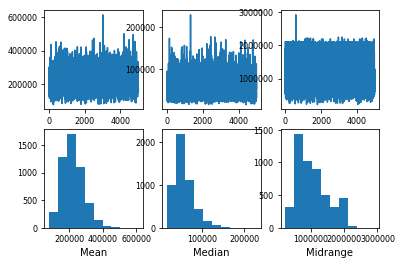

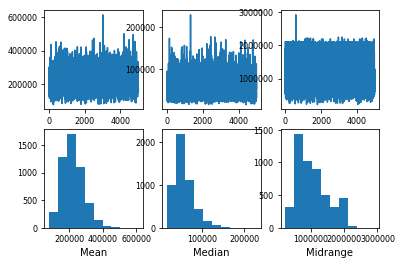

In [9]:
from pandas.plotting import bootstrap_plot
data = df["Flaeche"]
bootstrap_plot(data, samples=5000)

In [10]:
mydata = df.groupby("WocheJahr")["V_Laser"].sum()

WocheJahr
201601    6.906546e+06
201602    1.344453e+07
201603    1.215517e+07
201604    1.208728e+07
201605    1.832019e+07
201606    8.107003e+06
201607    1.615598e+07
201608    2.430465e+07
201609    1.950376e+07
201610    7.915689e+06
201611    1.603058e+07
201612    1.247219e+07
201613    5.906802e+06
201614    3.007830e+06
201615    9.767605e+06
201616    2.897508e+07
201617    8.426767e+06
201618    1.572995e+07
201619    2.244120e+07
201620    1.347953e+07
201621    1.289189e+07
201622    1.329046e+07
201623    2.481277e+07
201624    1.802949e+07
201625    2.138958e+07
201626    1.524419e+07
201627    2.232267e+07
201628    2.218450e+07
201629    1.430059e+07
201630    1.282446e+07
              ...     
201740    7.599979e+06
201741    9.174814e+06
201742    1.082771e+07
201743    1.300366e+07
201744    2.976305e+06
201745    1.482336e+07
201746    1.666913e+07
201747    1.129366e+07
201748    7.096276e+06
201749    7.190614e+06
201750    7.999428e+06
201751    5.302064e+06
2

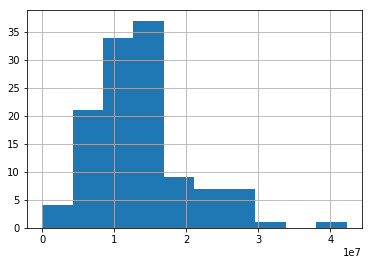

In [11]:
print( mydata )
mydata.hist()

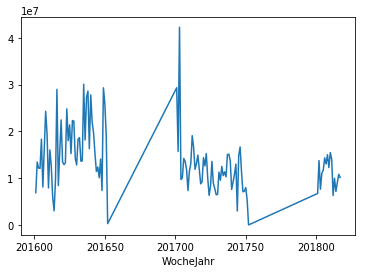

In [12]:
mydata.plot()

In [13]:
# https://www.grund-wissen.de/informatik/python/scipy/pandas.html
mydf = df.filter( items=["WocheJahr", "Dauer_MIN", "Dicke1_mm", "Flaeche"])

In [14]:
mydf.columns
mydf.values

array([[2.01601000e+05, 2.54441346e+00, 8.00000000e+00, 8.94000000e+03],
       [2.01601000e+05, 2.92731866e-01, 1.00000000e+00, 2.17764000e+05],
       [2.01601000e+05, 2.92731866e-01, 1.00000000e+00, 2.17764000e+05],
       ...,
       [2.01817000e+05, 2.97729263e-02, 4.00000000e+00, 1.75000000e+03],
       [2.01817000e+05, 1.55640956e-02, 5.00000000e+00, 2.68140000e+04],
       [2.01817000e+05, 1.55640956e-02, 5.00000000e+00, 2.68140000e+04]])

In [15]:
mydf.sort_values( "WocheJahr")

,WocheJahr,Dauer_MIN,Dicke1_mm,Flaeche
0,201601,2.544413,8.0,8940.0
1263,201601,2.453452,4.0,11024.0
1262,201601,0.359005,4.0,446925.0
1261,201601,0.596958,3.0,568384.0
1260,201601,0.495204,3.0,1287424.0
1259,201601,0.603155,3.0,98880.0
1258,201601,0.375150,4.0,84750.0
1257,201601,3.226276,6.0,1600.0
1256,201601,1.235003,3.0,176436.0
1255,201601,1.225083,3.0,182468.0


In [16]:
# nur Daten für einen Zeitraum auswerten
mydf[ mydf[ mydf["WocheJahr"]<=201800 ] >= 201700 ].describe()

,WocheJahr,Dauer_MIN,Dicke1_mm,Flaeche
count,162793.000000,0.0,0.0,9.912600e+04
mean,201722.941834,NaN,NaN,7.053989e+05
std,15.185558,NaN,NaN,6.296654e+05
min,201701.000000,NaN,NaN,2.017400e+05
25%,201710.000000,NaN,NaN,3.140700e+05
50%,201721.000000,NaN,NaN,4.761000e+05
75%,201737.000000,NaN,NaN,8.582970e+05
max,201752.000000,NaN,NaN,5.828220e+06


In [17]:
# Vergleich in einem Statement mit & AND    | OR (bitweise)
mydf[ (mydf["WocheJahr"]<=201800) & (mydf["WocheJahr"]>=201700) ].describe()

,WocheJahr,Dauer_MIN,Dicke1_mm,Flaeche
count,162793.000000,162793.000000,162793.000000,1.627930e+05
mean,201722.941834,2.191340,5.343507,2.067296e+05
std,15.185558,2.549263,3.046243,3.929134e+05
min,201701.000000,0.001890,0.500000,1.000000e+02
25%,201710.000000,0.674345,3.000000,1.216800e+04
50%,201721.000000,1.324085,5.000000,4.558000e+04
75%,201737.000000,2.747866,6.000000,2.142000e+05
max,201752.000000,55.573519,20.000000,5.828220e+06


In [18]:
mydf2 = mydf[ (mydf["WocheJahr"]<=201800) & (mydf["WocheJahr"]>=201700) ]

In [19]:
mydf2[ ["WocheJahr", "Dicke1_mm"] ].describe()

,WocheJahr,Dicke1_mm
count,162793.000000,162793.000000
mean,201722.941834,5.343507
std,15.185558,3.046243
min,201701.000000,0.500000
25%,201710.000000,3.000000
50%,201721.000000,5.000000
75%,201737.000000,6.000000
max,201752.000000,20.000000


In [20]:
# Anzahl Zeilen ermitteln
n = len( mydf2 )
print( n )

162793


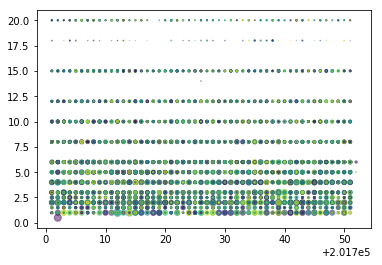

In [21]:
x = mydf2[ "WocheJahr"]
y = mydf2[ "Dicke1_mm"]
z = mydf2[ "Dauer_MIN"]
colors = np.random.rand( n )
plt.scatter( x, y, s=z, c=colors, alpha=0.5  ) 

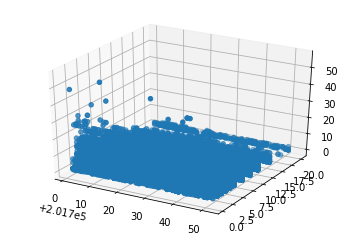

In [22]:
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import matplotlib.pyplot as plt



mpl.rcParams['legend.fontsize'] = 10


fig = plt.figure()

ax = fig.gca(projection='3d')

# theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
# z = np.linspace(-2, 2, 100)
# r = z**2 + 1
# x = r * np.sin(theta)
# y = r * np.cos(theta)

#ax.plot(x, y, z, label='parametric curve')
ax.scatter( x, y, z, s=20 )

plt.show()


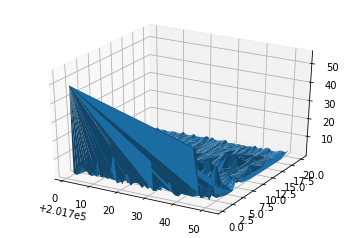

In [23]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.gca(projection='3d')

ax.plot_trisurf(x,y,z)
plt.show()

In [24]:
mydata2 = mydf2.groupby("WocheJahr")["Dauer_MIN"].sum()
print( mydata2 )

WocheJahr
201701    15885.367510
201702     7842.218941
201703    24809.566897
201704     5838.835973
201705     6342.820087
201706     8293.472399
201707     8018.106862
201708     7199.077218
201709     4501.786816
201710     6244.716502
201711     7534.363453
201712    11746.354916
201713    10405.571363
201714     8322.757220
201715     9173.165144
201716     9589.760975
201717     7885.989569
201718     5071.910976
201719     5903.900272
201720     7911.847954
201721     7062.752838
201722     8772.274464
201723     5216.955275
201724     3426.704513
201725     4502.432245
201726     7218.745939
201727     5125.913933
201728     4462.813343
201729     3680.455953
201730     3624.928552
201731     6435.307963
201732     5054.746514
201733     6704.970641
201734     5923.074235
201735     6781.351116
201736     5628.521198
201737     7864.366865
201738     7157.230184
201739     7982.017727
201740     4095.892813
201741     5501.451470
201742     6044.098100
201743     7850.782460
2

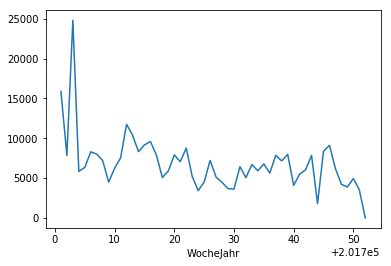

In [25]:
mydata2.plot()

In [26]:
mydata2.describe()

count       52.000000
mean      6860.286130
std       3589.053700
min          7.568367
25%       5029.538170
50%       6389.064025
75%       7929.390397
max      24809.566897
Name: Dauer_MIN, dtype: float64

In [27]:
# spalte in array für k-near überführen
#X = df[ "Dicke1_mm"].values.reshape(-1,1)

In [28]:
#from sklearn.neighbors import NearestNeighbors
#nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)

In [29]:
#distances, indices = nbrs.kneighbors(X)

In [30]:
# # spalte in array für k-near überführen
# rohmat = df[ "ZUG_IDENT_NR"]

In [31]:
#rohmat = df.groupby(["ZUG_IDENT_NR","WocheJahr"])["Dauer_MIN"].sum()
rohmat = df.groupby(["ZUG_IDENT_NR"])["Dauer_MIN"].count()

In [32]:
rohmat.describe()

count       79.000000
mean      5410.468354
std      15889.864550
min          1.000000
25%          7.000000
50%         50.000000
75%        535.500000
max      76654.000000
Name: Dauer_MIN, dtype: float64

In [33]:
myrohmat = rohmat.nlargest(50)
print(myrohmat)

ZUG_IDENT_NR
2018     76654
2020     76582
2017     53264
2016     50325
2019     41562
2021     34860
2094     31333
2022     28391
2063      9588
2069      5853
3243      5130
2015      2139
2073      1508
2028      1114
2025      1016
59295      992
32145      885
2034       842
13116      645
35773      578
2049       493
2040       451
2054       408
5627       363
18701      241
70214      192
2064       172
42100      159
23125      157
2071       156
70213      148
78819      137
13401      109
13400      104
19509       97
3329        80
2166        79
38920       78
19267       77
2171        50
66584       36
2074        32
2452        32
2024        30
2060        29
35340       28
2065        21
6944        21
26966       16
8228        15
Name: Dauer_MIN, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002580B2940F0>,
      dtype=object)

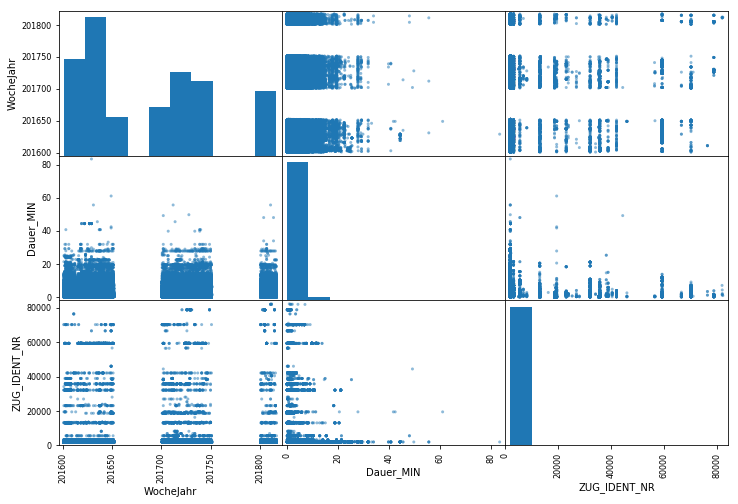

In [34]:
from pandas.plotting import scatter_matrix
attributes2 = ["WocheJahr", "Dauer_MIN", "ZUG_IDENT_NR"]
scatter_matrix(df[attributes2], figsize=(12,8))